# tensorflow 2.0를 이용하여 데이터 탐색

In [0]:
#tensorflow 2.0

from tensorflow.examples.tutorials.mnist import input_data

cifar=input_data.read_data_sets('./cifar10/data',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./cifar10/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./cifar10/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./cifar10/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./cifar10/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mni

In [0]:
print(type(cifar.train))
print(type(cifar.train.images),type(cifar.validation.images),type(cifar.test.images))
print(type(cifar.train.labels),type(cifar.validation.labels),type(cifar.test.labels))

<class 'tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [0]:
print(cifar.train.images.shape,cifar.validation.images.shape,cifar.test.images.shape)
print(cifar.train.labels.shape,cifar.validation.labels.shape,cifar.test.labels.shape)

(55000, 784) (5000, 784) (10000, 784)
(55000, 10) (5000, 10) (10000, 10)


## 데이터 이미지 

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


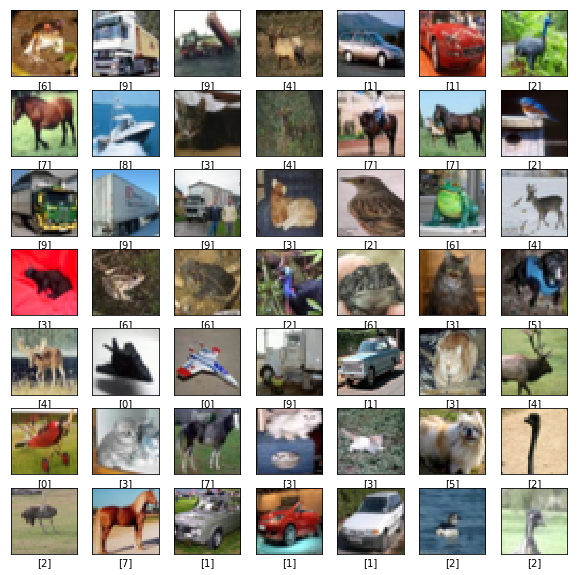

In [4]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

for i in range(49):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(y_train[i])
    
plt.show()

# CNN

In [0]:
import os, warnings
warnings.filterwarnings(action="ignore")


# 이미지 처리 분야에서 가장 유명한 신경망 모델인 CNN 을 이용
import tensorflow as tf
import time
from IPython.display import display, Image

### * 내가 만든 신경망모델 *

#### 입력층 : Node=784 (unit)
#### 은닉층 : 3개층  Node=2^4=16 (unit)
#### 출력층 : 범주 10개  Node=10 (unit)

In [0]:
X=tf.placeholder(tf.float32,[None,784])
Y=tf.placeholder(tf.float32,[None,10])  


#은닉층
W1=tf.Variable(tf.random_normal([784,16],stddev=0.01))
L1=tf.nn.relu(tf.matmul(X,W1))

W2=tf.Variable(tf.random_normal([16,16],stddev=0.01))
L2=tf.nn.relu(tf.matmul(L1,W2))

W3=tf.Variable(tf.random_normal([16,16],stddev=0.01))
L3=tf.nn.relu(tf.matmul(L2,W3))

W4=tf.Variable(tf.random_normal([16,10],stddev=0.01))

model=tf.matmul(L3,W4) 

In [0]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model,labels=Y))

### GradientDescent을 이용하여 0.001속도로 진행

In [0]:
optimizer=tf.train.GradientDescentOptimizer(0.001).minimize(cost)

In [0]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
  
    for epoch in range(1,10+1):
        total_cost=0
    
        for i in range(1,100+1):
          #데이터 불러오기
          batch_xs,batch_ys=cifar.train.next_batch(550) #55000%100=550
          #학습하기
          _,cost_val=sess.run([optimizer,cost],feed_dict={X:batch_xs,Y:batch_ys})
      
          total_cost=total_cost+cost_val
          if i%10==0:
            print(i,"번 학습시 cost = ",cost_val)
        
        print("\n","-"*30,"\n")
  
        print("{a} Epoch시,".format(a=epoch)) 
        print("평균 cost : {:.3f}".format(total_cost/100))
  
        print("\n","-"*30,"\n")
      

10 번 학습시 cost =  2.3025844
20 번 학습시 cost =  2.3025846
30 번 학습시 cost =  2.3025844
40 번 학습시 cost =  2.3025842
50 번 학습시 cost =  2.3025842
60 번 학습시 cost =  2.3025844
70 번 학습시 cost =  2.3025842
80 번 학습시 cost =  2.3025842
90 번 학습시 cost =  2.3025842
100 번 학습시 cost =  2.3025842

 ------------------------------ 

1 Epoch시,
평균 cost : 2.303

 ------------------------------ 

10 번 학습시 cost =  2.3025844
20 번 학습시 cost =  2.3025846
30 번 학습시 cost =  2.3025842
40 번 학습시 cost =  2.3025846
50 번 학습시 cost =  2.3025842
60 번 학습시 cost =  2.3025842
70 번 학습시 cost =  2.3025846
80 번 학습시 cost =  2.3025842
90 번 학습시 cost =  2.3025844
100 번 학습시 cost =  2.3025844

 ------------------------------ 

2 Epoch시,
평균 cost : 2.303

 ------------------------------ 

10 번 학습시 cost =  2.3025842
20 번 학습시 cost =  2.3025846
30 번 학습시 cost =  2.3025844
40 번 학습시 cost =  2.3025842
50 번 학습시 cost =  2.3025846
60 번 학습시 cost =  2.3025844
70 번 학습시 cost =  2.3025844
80 번 학습시 cost =  2.3025844
90 번 학습시 cost =  2.3025842
100 번 학습시 cost =  2.302

### GradientDescentOptimizer는 Epoch를 몇번하든 cost값이 동일하네

### Adam을 이용하여 0.001속도로 진행

In [0]:
optimizer2=tf.train.AdamOptimizer(0.001).minimize(cost)

In [0]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
  
    for epoch in range(1,10+1):
        total_cost=0
    
        for i in range(1,100+1):
          #데이터 불러오기
          batch_xs,batch_ys=cifar.train.next_batch(550) #55000%100=550
          #학습하기
          _,cost_val=sess.run([optimizer2,cost],feed_dict={X:batch_xs,Y:batch_ys})
      
          total_cost=total_cost+cost_val
          if i%10==0:
            print(i,"번 학습시 cost = ",cost_val)
        
        print("\n","-"*30,"\n")
  
        print("{a} Epoch시,".format(a=epoch)) 
        print("평균 cost : {:.3f}".format(total_cost/100))
  
        print("\n","-"*30,"\n")

10 번 학습시 cost =  2.3025134
20 번 학습시 cost =  2.300938
30 번 학습시 cost =  2.2888656
40 번 학습시 cost =  2.2328062
50 번 학습시 cost =  2.0850103
60 번 학습시 cost =  1.9061812
70 번 학습시 cost =  1.8353946
80 번 학습시 cost =  1.7902071
90 번 학습시 cost =  1.7536036
100 번 학습시 cost =  1.7160589

 ------------------------------ 

1 Epoch시,
평균 cost : 2.048

 ------------------------------ 

10 번 학습시 cost =  1.754313
20 번 학습시 cost =  1.6227552
30 번 학습시 cost =  1.6240435
40 번 학습시 cost =  1.5853
50 번 학습시 cost =  1.623124
60 번 학습시 cost =  1.5772349
70 번 학습시 cost =  1.5060421
80 번 학습시 cost =  1.541962
90 번 학습시 cost =  1.4401356
100 번 학습시 cost =  1.4731159

 ------------------------------ 

2 Epoch시,
평균 cost : 1.589

 ------------------------------ 

10 번 학습시 cost =  1.4301798
20 번 학습시 cost =  1.3924857
30 번 학습시 cost =  1.4733315
40 번 학습시 cost =  1.3919985
50 번 학습시 cost =  1.4398072
60 번 학습시 cost =  1.3514457
70 번 학습시 cost =  1.3048518
80 번 학습시 cost =  1.3181883
90 번 학습시 cost =  1.3277054
100 번 학습시 cost =  1.3475802

 

### AdamOptimizer는 Epoch가 증가할수록 cost값이 감소하네.